<a href="https://colab.research.google.com/github/dyong00/2020-2-AI/blob/master/code/07_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 케라스 구현

In [ ]:
import tensorflow as tf

# 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4] #입력 문제
y_train = [2, 4, 6, 8] #출력 정답 y = 2x

# 모델 구성(생성)
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear') # 풀력, 입력(벡터의 1차원 배열)
    #항등함수인 linear defalut가 linear라 안써도 됨 
    #Dense(1, input_dim=1) #input_shape=(1, )이걸 input_dim의 값으로 써도 됨
])

# 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse']) #옵티마이저, 손실값, 출력정보를 mae와 mse로
#SGD : 확률적 경사하강법 > 경사 하강법의 계산랼을 줄이기 위해 전체를 계산하지 않고 확률적으로 일부만 계산
#mae : 평균 절대 오차 : 모든 예측과 정답과의 오차 합의 평균 
#mse : 오차평균제곱합

# 모델을 표시(시각화)
model.summary()

# 생성된 모델로 훈련 데이터 학습
# 훈련 과정 정보를 history 객체에 저장 > history객체에는 매 에폭마다의 훈련/검증 손실값/정확도 가 저장
history = model.fit(x_train, y_train, epochs=500) #500번 훈련

# 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5] #입력 문제
y_test = [2.4, 4.6, 6.8, 9.0] #출력 정답

print('손실', model.evaluate(x_test, y_test))

# x = [3.5, 5, 5.5, 6]의 예측
print(model.predict([3.5, 5, 5.5, 6])) #정답은 7

pred = model.predict([3.5, 5, 5.5, 6])
# 예측값만 1차원으로
print(pred.flatten()) #예측 값을 1차원으로 평탄화
print(pred.squeeze()) #또는 squeeze()해도 된다

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 9.8553 - mae: 2.8658 - mse: 9.8553
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 6.8445 - mae: 2.3786 - mse: 6.8445
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 4.7553 - mae: 1.9728 - mse: 4.7553
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 3.3057 - mae: 1.6348 - mse: 3.3057
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2997 - mae: 1.3533 - mse: 2.2997
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 1.6017 - mae: 1.1188 - mse: 1.6017
Epoch 7/500
1/1 [=

# 손실과 mae 시각화

Text(0, 0.5, 'loss')

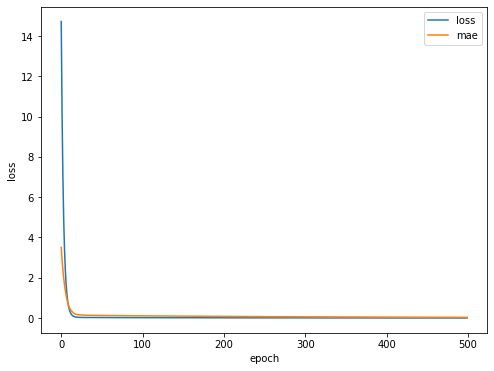

In [ ]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='loss') #손실
plt.plot(history.history['mae'], label='mae') #mae 평균절대 오차
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

# 예측값 시각화 y = 2x

Text(0, 0.5, 'y')

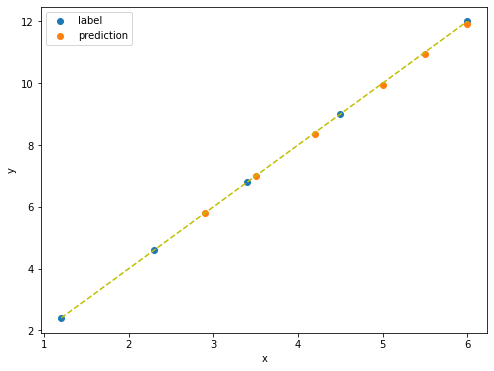

In [ ]:
import matplotlib.pylab as plt 

x_test = [1.2, 2.3, 3.4, 4.5, 6.0] #테스트 문제
y_test = [2.4, 4.6, 6.8, 9.0, 12.0] #테스트 정답 y = 2x

# 그래프 그리기
fig = plt.figure(figsize=(8, 6))

plt.scatter(x_test, y_test, label='label') #정답 / 파란색 점 
plt.plot(x_test, y_test, 'y--') #정답에 맞는 1차원 그래프 / 노란색 점선

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x) #x에 대한 예측값을 구함
plt.scatter(x, pred.flatten(), label='prediction') #2차원을 1차원으로 변환시켜준 후 scatter로 그래프에 표시 / 주황색 점

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 모델 구성(생성)
model = Sequential ([
    Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

# 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse'])

# 모델을 표시(시각화)
model.summary()

# 생성된 모델로 훈련 데이터 학습
model.fit(x_train, y_train, epochs=1000)

# 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('정확도', model.evaluate(x_test, y_test)) #정확도를 평가

print(model.predict([3.5, 5, 5.5, 6]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 22.1681 - mae: 4.2981 - mse: 22.1681
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 15.3958 - mae: 3.5674 - mse: 15.3958
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 10.6965 - mae: 2.9588 - mse: 10.6965
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.4357 - mae: 2.4519 - mse: 7.4357
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.1730 - mae: 2.0296 - mse: 5.1730
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.6029 - mae: 1.6780 - mse: 3.6029
Epoch 

# 케라스로 예측

In [ ]:
import tensorflow as tf
import numpy as np

# 훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4]) #문제 훈련 10 1 2 / 테스트 3 4
y = np.array([1, 3, 5, 7, 9]) #정답 훈련1 3 5  / 테스트 7 9   > y = 2x + 1

# 인공신경망 모델 사용 및 생성
model = tf.keras.models.Sequential() 

# 은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 모델의 패라미터를 지정하고 모델 구조를 생성
# 최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
# 손실함수(loss Function) : 평균제곱오차(MSE: Mean Square Error)
model.compile('SGD', 'mse')

# 생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
# 키워드 매개변수 epoch(에폭) : 훈련반복횟수
# 키워드 매개변수 verbose : 학습진행사항 표시
model.fit(x_test, y_test, epochs=1000, verbose=0) #1000번 훈련

# 테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

# 학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.0019183 7.9961076]


In [ ]:
import tensorflow as tf
import numpy as np

# 훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9])   #y = x * 2 + 1

# 인공신경망 모델 사용
model = tf.keras.models.Sequential()

# 은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 모델의 패라미터를 지정한 후 학습
model.compile('SGD', 'mse')
model.fit(x[3:],y[3:], epochs=1000, verbose=0)

print('Targets(정답):', y[3:])
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.960453 9.030308]
